
# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

### Not for Grading

<h2><b>Handwritten Digit Recognition</b></h2>
<b> Problem Statement: </b> <br>
The goal of this project is to create a model that will be able to recognize and determine the handwritten digits from its image by using ML/DL techniques and observe the performance difference between various techniques. <br>
We use MNIST dataset for this task.

<b>MNIST Dataset : </b> <br>
The MNIST dataset developed by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models on the handwritten digit classification problem.
<br>

The dataset was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). This is where the name for the dataset comes from, as the Modified NIST or MNIST dataset.
Images of digits were taken from a variety of scanned documents, normalized in size and centered. This makes it an excellent dataset for evaluating models, allowing the developer to focus on the machine learning with very little data cleaning or preparation required.


Each image is a 28 by 28 pixel square (784 pixels total). A standard split of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model and a separate set of 10,000 images are used to test it.

![altxt](https://i.pinimg.com/originals/f2/7a/ac/f27aac4542c0090872110836d65f4c99.jpg)

### Setup Steps

In [3]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [1]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [4]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U3W13_Demo_MNIST_MLP" #name of the notebook
Answer = "Ungraded"
def setup():
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Casestudies_slides/123_pattern_spectrogram/Numbers.zip")
    ipython.magic("sx unzip Numbers.zip")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


In [5]:
!pip install torch==1.4.0
!pip install torchvision==0.5.0
!pip install torchviz

     |████████████████████████████████| 753.4MB 17kB/s 
ERROR: torchvision 0.8.1+cu101 has requirement torch==1.7.0, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
     |████████████████████████████████| 4.0MB 5.3MB/s 
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101
     |████████████████████████████████| 51kB 3.8MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3520 sha256=abac2212e7521efcceb22389de2f9a7cb344319ae95b109d5ed14813b54c9564
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


In [6]:
# import libraries
import torch
import numpy as np
import torchvision
from matplotlib import pyplot as plt
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

print("All libraries are loaded")

All libraries are loaded


In [8]:
# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,download=True, transform=transform)

print(len(train_data))

train_data, val_data = torch.utils.data.random_split(train_data, [50000, 10000])


test_data = datasets.MNIST(root='data', train=False,download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
print("Training data created")
print("Train-Data length : ", len(train_data))


val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)
print("Validation data created")
print("Validation-Data length : ", len(val_data))


test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)
print("Test data created")
print("Test-Data length : ", len(test_data))



60000
Training data created
Train-Data length :  50000
Validation data created
Validation-Data length :  10000
Test data created
Test-Data length :  10000


Some of the training samples and their labels : 




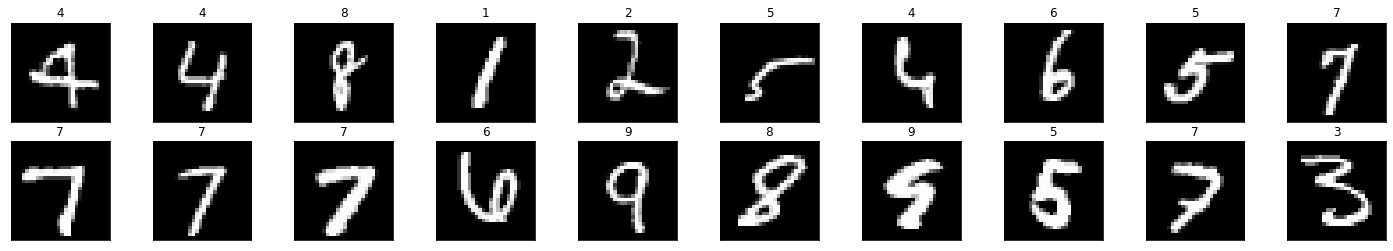

In [9]:
print("Some of the training samples and their labels : \n")
%matplotlib inline
   
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))
print()

Pixel level View of one of the training sample 




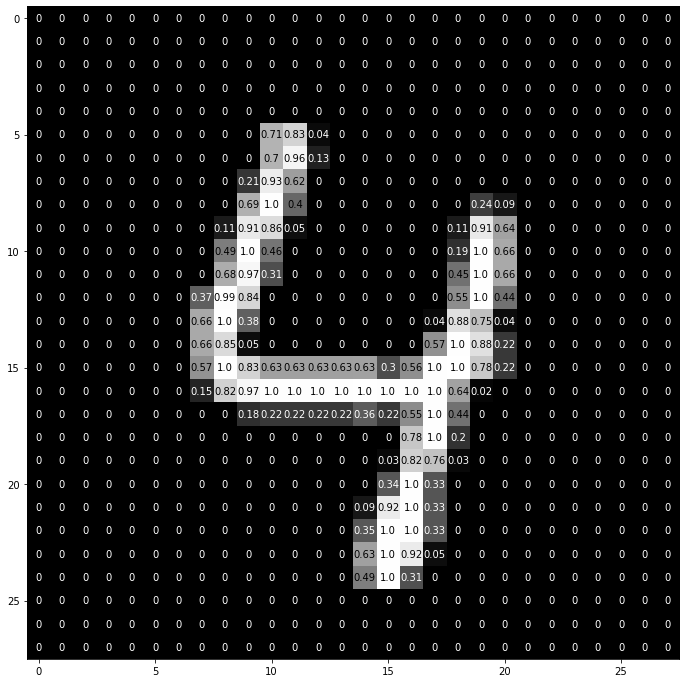

In [10]:
print ("Pixel level View of one of the training sample \n")
img = np.squeeze(images[1])
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')
print()

In [11]:
## Define the NN architecture

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)        
        self.fc2 = nn.Linear(512, 512)       # linear layer (n_hidden -> hidden_2)  
        self.fc3 = nn.Linear(512, 10)        # linear layer (n_hidden -> 10)
        #self.dropout = nn.Dropout(0.2)       # dropout layer (p=0.2) # dropout prevents overfitting of data

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


##**My network**

In [12]:
class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()

        # convolution layers
        self._body = nn.Sequential(
            # First convolution Layer
            # input size = (32, 32), output size = (28, 28)
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5),
            # ReLU activation
            nn.ReLU(inplace=True),
            # Max pool 2-d
            nn.MaxPool2d(kernel_size=2),
            
            # Second convolution layer
            # input size = (14, 14), output size = (10, 10)
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            # output size = (5, 5)
        )
        
        # Fully connected layers
        self._head = nn.Sequential(
            # First fully connected layer
            # in_features = total number of weights in last conv layer = 16 * 5 * 5
            nn.Linear(in_features=16 * 5 * 5, out_features=120), 
            
            # ReLU activation
            nn.ReLU(inplace=True),
            
            # second fully connected layer
            # in_features = output of last linear layer = 120 
            nn.Linear(in_features=120, out_features=84), 
            
            # ReLU activation
            nn.ReLU(inplace=True),
            
            # Third fully connected layer. It is also output layer
            # in_features = output of last linear layer = 84
            # and out_features = number of classes = 10 (MNIST data 0-9)
            nn.Linear(in_features=84, out_features=10)
        )

    def forward(self, x):
        # apply feature extractor
        x = self._body(x)
        # flatten the output of conv layers
        # dimension should be batch_size * number_of weights_in_last conv_layer
        x = x.view(x.size()[0], -1)
        # apply classification head
        x = self._head(x)
        return x

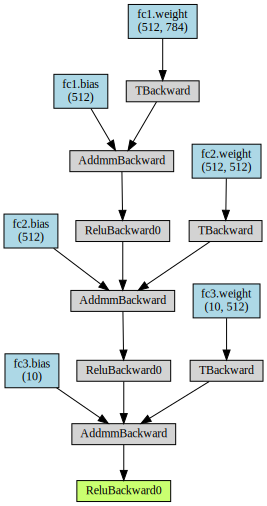

In [17]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
from torchviz import make_dot
img_grid=torchvision.utils.make_grid(images)
make_dot(model(images), params=dict(model.named_parameters()))

In [18]:
## Specify loss and optimization functions

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

print(criterion, optimizer)

CrossEntropyLoss() SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [22]:
# number of epochs to train the model
n_epochs = 5  # suggest training between 20-50 epochs

model.train() # prep model for training

for epoch in range(n_epochs):
    
    train_loss = 0.0                    #Initialize training, val loss
    val_loss=0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        optimizer.zero_grad()            # clear the gradients of all optimized variables
        output = model(data)             # forward pass: compute predicted outputs by passing inputs to the model
        loss = criterion(output, target) # calculate the loss
        loss.backward()                  # backward pass: compute gradient of the loss with respect to model parameters
        optimizer.step()                 # perform a single optimization step (parameter update)
        train_loss += loss.item()*data.size(0)  # update running training loss
    
    
    
    for data, target in val_loader:
        output = model(data)                  # forward pass: compute predicted outputs by passing inputs to the model
        loss = criterion(output, target)      # calculate the loss
        val_loss += loss.item()*data.size(0)  # update running training loss
        
    # print training statistics 
    train_loss = train_loss/len(train_loader.dataset)  # calculate average loss over an epoch"""
    val_loss = val_loss/len(val_loader.dataset)        # Validation loss 

    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format( epoch+1, train_loss, val_loss ))
    print("Training is done\n")

Epoch: 1 	Training Loss: 0.078828 	Validation Loss: 0.110681
Training is done

Epoch: 2 	Training Loss: 0.071514 	Validation Loss: 0.105984
Training is done

Epoch: 3 	Training Loss: 0.065069 	Validation Loss: 0.102026
Training is done

Epoch: 4 	Training Loss: 0.059333 	Validation Loss: 0.098652
Training is done

Epoch: 5 	Training Loss: 0.054217 	Validation Loss: 0.095724
Training is done



In [21]:
# Testing the  model 
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    output = model(data)                            # forward pass: compute predicted outputs by passing inputs to the model
    loss = criterion(output, target)                # calculate the loss
    test_loss += loss.item()*data.size(0)           # update test loss 
    _, pred = torch.max(output, 1)                  # convert output probabilities to predicted class
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))        # compare predictions to true label
    
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))
print()

Test Loss: 0.100148

Test Accuracy of     0: 98% (968/980)
Test Accuracy of     1: 98% (1119/1135)
Test Accuracy of     2: 96% (996/1032)
Test Accuracy of     3: 97% (985/1010)
Test Accuracy of     4: 96% (950/982)
Test Accuracy of     5: 95% (850/892)
Test Accuracy of     6: 97% (933/958)
Test Accuracy of     7: 96% (996/1028)
Test Accuracy of     8: 95% (929/974)
Test Accuracy of     9: 95% (964/1009)

Test Accuracy (Overall): 96% (9690/10000)



Test Images and their predicted labels : 



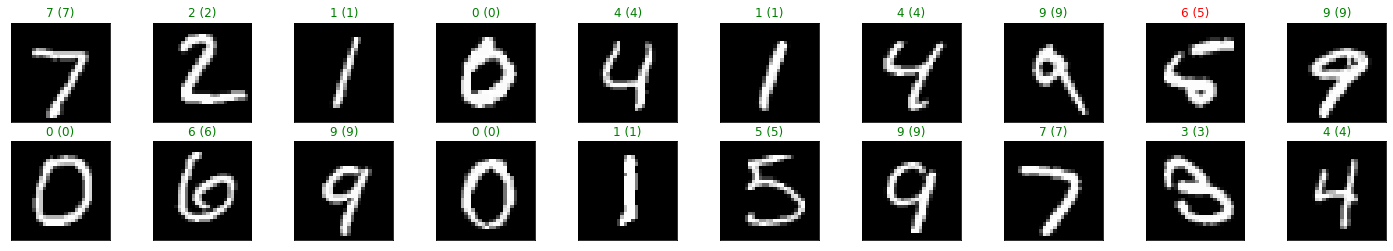

In [24]:
# obtain one batch of test images

print("Test Images and their predicted labels : \n")

dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)

_, preds = torch.max(output, 1)  # convert output probabilities to predicted class
images = images.numpy()         # prep images for display

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

## Please answer the questions below to complete the experiment:

In [23]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [25]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "nin" #@param {type:"string"}


In [26]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]

In [27]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [28]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 10419
Date of submission:  02 Dec 2020
Time of submission:  02:08:52
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
